In [32]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import numpy as np
import math, scipy
import time
import pickle
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

## replace text in column name
df.columns = df.columns.str.replace('$','')
## Reorder columns
df = df[['x','z','y','q','p']]
## Replace values
df['col'] = df['col'].replace([1,3,6],1)
## Rename columns
df.rename(columns={'e':'new_e'},inplace=True)
## Drop column
df = df.drop(['col'], axis = 1)
## To replace values with null values
df['col'] = df['col'].replace([list of values], np.NaN)
## Fill NaN's with some numbers
df['col']  = df['col'].fillna(0)

In [33]:
# Reading the files
subs = pd.read_csv("subs_ML.csv")
non_subs = pd.read_csv("non_subs_ML.csv")

In [34]:
subs = subs[['age', 'profiles', 'cases', 'gender', 'Output']]
subs['Output'] = subs['Output'].replace([1,3,6],1)
subs.head()

,age,profiles,cases,gender,Output
0,33.0,9,0,Female,1
1,65.0,9,0,Male,1
2,59.0,9,0,Female,1
3,33.0,10,6,Female,1
4,65.0,10,6,Male,1


In [35]:
subs.shape

(5085, 5)

In [36]:
non_subs = non_subs[['age', 'profiles', 'cases', 'gender']]
non_subs['Output'] = 0

In [37]:
non_subs_sampled = non_subs.sample(n=10000, random_state=42)

In [38]:
final = pd.concat([subs, non_subs_sampled])
final = final.sample(frac=1)
final.shape

(15085, 5)

In [39]:
final['gender'] = final['gender'].replace(['Female', 'female'], 'female')
final['gender'] = final['gender'].replace(['MALE', 'Male', 'Others', 'male'], 'male')

In [47]:
final

,age,profiles,cases,Output,gender
3588,57.0,1.0,1,1,0
1072,35.0,3.0,1,1,1
21884,18.0,2.0,1,0,1
19364,23.0,1.0,1,0,1
17317,22.0,1.0,1,0,1
...,...,...,...,...,...
65042,26.0,2.0,1,0,1
4199,61.0,1.0,2,1,0
2306,30.0,8.0,2,1,0
39670,38.0,1.0,0,0,0


In [41]:
final = pd.get_dummies(final, drop_first=True)
final = final.rename(columns = {'gender_male':'gender'})

In [42]:
# List of age values to remove
to_remove = list(final[final['age']>120]['age'].unique())

In [43]:
# Age>120 to be made null and ultimately remove null values
final['age'] = final['age'].replace(to_remove, np.NaN)

In [44]:
# Null values percentage
final.isnull().sum()/((final.isnull().sum()) + final.notnull().sum())

age         0.197945
profiles    0.000464
cases       0.000000
Output      0.000000
gender      0.000000
dtype: float64

In [45]:
# Null values in profiles to be filled with value -> 0
final['profiles']  = final['profiles'].fillna(0)
final['age'] = final['age'].fillna(26)

In [46]:
final.describe()

,age,profiles,cases,Output,gender
count,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000
mean,29.803646,1.793835,1.312562,0.337090,0.658800
std,12.323526,1.389738,3.445731,0.472732,0.474128
min,11.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,0.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,0.000000,1.000000
75%,31.000000,2.000000,1.000000,1.000000,1.000000
max,120.000000,17.000000,54.000000,1.000000,1.000000


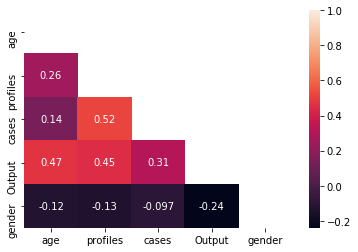

In [16]:
sns.heatmap(final.corr(), annot=True, mask = np.triu(final.corr()))

## Imputing missing age values

In [18]:
final.describe()

,age,profiles,cases,Output,gender
count,15085.000000,15085.000000,15085.000000,15085.000000,15085.000000
mean,29.803646,1.793835,1.312562,0.337090,0.658800
std,12.323526,1.389738,3.445731,0.472732,0.474128
min,11.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,0.000000,0.000000,0.000000
50%,26.000000,1.000000,1.000000,0.000000,1.000000
75%,31.000000,2.000000,1.000000,1.000000,1.000000
max,120.000000,17.000000,54.000000,1.000000,1.000000


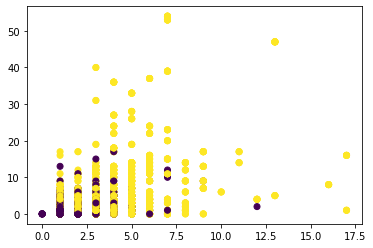

In [19]:
plt.scatter(final['profiles'], final['cases'], c = final['Output'])
plt.show()

In [48]:
input = final

In [49]:
input_X = input[['profiles', 'cases', 'gender', 'age']]

In [50]:
input_y = input[['Output']]

In [51]:
X_tr, X_val, y_tr, y_val = train_test_split(input_X, input_y, random_state = 42)

In [52]:
input

,age,profiles,cases,Output,gender
3588,57.0,1.0,1,1,0
1072,35.0,3.0,1,1,1
21884,18.0,2.0,1,0,1
19364,23.0,1.0,1,0,1
17317,22.0,1.0,1,0,1
...,...,...,...,...,...
65042,26.0,2.0,1,0,1
4199,61.0,1.0,2,1,0
2306,30.0,8.0,2,1,0
39670,38.0,1.0,0,0,0


In [22]:
scale = MinMaxScaler()

In [23]:
X_tr = scale.fit_transform(X_tr)
X_tr = pd.DataFrame(X_tr, columns=(input_X.columns))

In [24]:
X_val = scale.transform(X_val)
X_val = pd.DataFrame(X_val, columns=(input_X.columns))

In [31]:
dt.predict(scale.transform([[26,2,1,1]]))

array([1], dtype=int64)

In [53]:
dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)
dt.fit(X_tr, y_tr)
print(dt.score(X_tr, y_tr))
print(dt.score(X_val, y_val))

0.8566251215415893
0.8422587486744433


In [54]:
log_reg = LogisticRegression(C = 10, n_jobs=-1)
log_reg.fit(X_tr, y_tr)
print(log_reg.score(X_tr, y_tr))
print(log_reg.score(X_val, y_val))

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8348802262883408
0.8329798515376459


In [26]:
svm = SVC(C=10, kernel='rbf', probability=True)
svm.fit(X_tr, y_tr)
print(svm.score(X_tr, y_tr))
print(svm.score(X_val, y_val))

C:\Users\Manjinder\anaconda3\envs\subscription_buyer_prediction\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8313444709626094
0.8369565217391305


In [27]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_tr, y_tr)
print(knn.score(X_tr, y_tr))
print(knn.score(X_val, y_val))

C:\Users\Manjinder\anaconda3\envs\subscription_buyer_prediction\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.8532661539821444
0.8454400848356309


In [28]:
vot_clf = VotingClassifier(estimators=[('dt', dt), ('log_reg', log_reg), ('svm', svm), ('knn', knn)], voting='soft')
vot_clf.fit(X_tr, y_tr)
print(vot_clf.score(X_tr, y_tr))
print(vot_clf.score(X_val, y_val))

C:\Users\Manjinder\anaconda3\envs\subscription_buyer_prediction\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.849730398656413
0.8475609756097561


In [29]:
rf = RandomForestClassifier(n_estimators=500, max_depth=7, min_samples_leaf=5, random_state=2)
rf.fit(X_tr, y_tr)
print(rf.score(X_tr, y_tr))
print(rf.score(X_val, y_val))

C:\Users\Manjinder\anaconda3\envs\subscription_buyer_prediction\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8527357906832848
0.8499469777306469


In [30]:
abc = AdaBoostClassifier(n_estimators=100, random_state=2)
abc.fit(X_tr, y_tr)
print(abc.score(X_tr, y_tr))
print(abc.score(X_val, y_val))

C:\Users\Manjinder\anaconda3\envs\subscription_buyer_prediction\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8458410677981084
0.8504772004241782


In [55]:
gbc = GradientBoostingClassifier(n_estimators=150, random_state=2)
gbc.fit(X_tr, y_tr)
print(gbc.score(X_tr, y_tr))
print(gbc.score(X_val, y_val))

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8538849111641474
0.8496818663838812


In [42]:
gbc.predict(scale.transform([[2,1,0,27]]))

array([0], dtype=int64)

In [40]:
def apply_ML(X_tr = X_tr, y_tr = y_tr,X_val= X_val, y_val = y_val, clf_name=None):
#     X_tr,X_val,y_tr,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
    if clf_name == 'DT':
        clf = DecisionTreeClassifier(max_depth=8,min_samples_leaf=5, criterion='entropy', random_state=42)
    if clf_name == 'GBC':
        clf = GradientBoostingClassifier(n_estimators=150, random_state = 2)
    if clf_name == 'RF':
        clf = RandomForestClassifier(n_estimators=500, max_depth=7, min_samples_leaf=5, random_state=2)
    if clf_name == 'LR':
        clf = LogisticRegression(C = 10, n_jobs=-1)
    if clf_name == 'KNN':
        clf = KNeighborsClassifier(n_neighbors=13)
    if clf_name == 'SVC':
        clf = SVC(C=10, kernel='rbf', probability=True)
    if clf_name == 'ABC':
        clf = AdaBoostClassifier(n_estimators=100, random_state=2)
    if clf_name == 'ETC':
        clf = ExtraTreesClassifier(n_estimators=150, random_state=2)
    clf.fit(X_tr,y_tr)
    print('Training accuracy:',clf.score(X_tr,y_tr))
    print('Val accuracy:',clf.score(X_val,y_val))
#     return clf

In [41]:
apply_ML(clf_name='ETC')

C:\Users\Manjinder\anaconda3\lib\site-packages\ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Training accuracy: 0.8748342614691064
Val accuracy: 0.8234358430540827


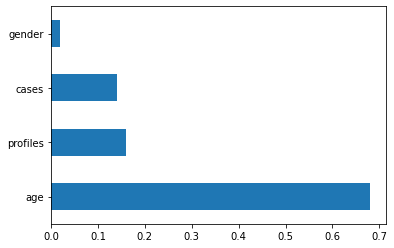

In [34]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(abc.feature_importances_, index=X_tr.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

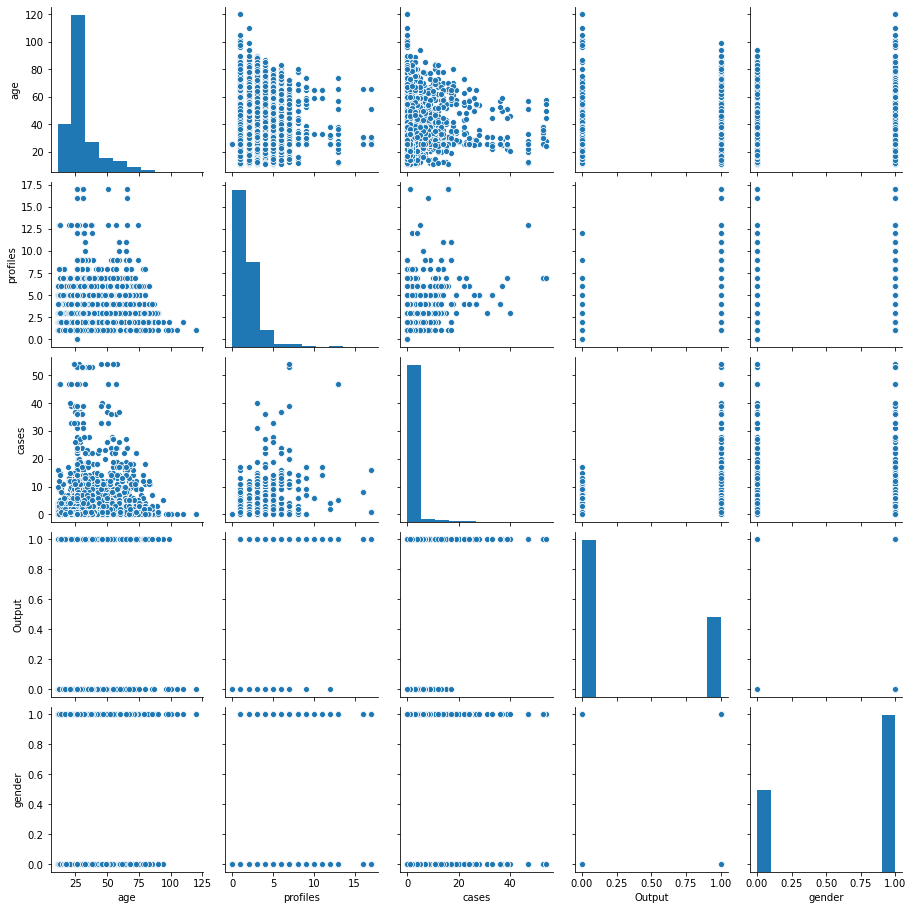

In [35]:
sns.pairplot(final)

In [323]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [324]:
params = {'n_estimators':n_estimators, 'max_features':max_features, 'max_depth':max_depth, 
          'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf}
rf_grid = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=params, cv=5)

In [325]:
tic = time.time()
rf_grid.fit(X_tr, y_tr)
toc = time.time()
print((toc-tic)/60)

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A co

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A co

2.723267364501953


In [326]:
print(rf_grid.score(X_tr, y_tr))
print(rf_grid.score(X_val, y_val))

0.850349155838416
0.8414634146341463


In [327]:
params_gbc = {'n_estimators':[i for i in range(80,200,30)],
             'min_samples_leaf':[1,2,5,10], 'min_samples_split':[2,5,10,15,100], 'max_depth':[2,6,9,12,20]}
gbm_grid = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions= params_gbc)

In [328]:
tic = time.time()
gbm_grid.fit(X_tr, y_tr)
toc = time.time()
print((toc-tic)/60)

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

KeyboardInterrupt: 

In [ ]:
print(gbm_grid.score(X_tr, y_tr))
print(gbm_grid.score(X_val, y_val))

In [332]:
params_abc = {'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 600, num = 12)]}
abc_grid = RandomizedSearchCV(estimator=AdaBoostClassifier(), param_distributions= params_abc)

In [333]:
tic = time.time()
abc_grid.fit(X_tr, y_tr)
toc = time.time()
print((toc-tic)/60)

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

1.2326027234395345


In [334]:
print(abc_grid.score(X_tr, y_tr))
print(abc_grid.score(X_val, y_val))

0.8480509148766905
0.8427889713679746


In [36]:
params_gbc = {'n_estimators':[i for i in range(80,301,20)]}
gbc_grid = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions= params_gbc)

In [37]:
tic = time.time()
gbc_grid.fit(X_tr, y_tr)
toc = time.time()
print((toc-tic)/60)

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Manjinder\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

1.777060822645823


In [43]:
print(gbc_grid.score(X_tr, y_tr))
print(gbc_grid.score(X_val, y_val))

NameError: name 'gbc_grid' is not defined

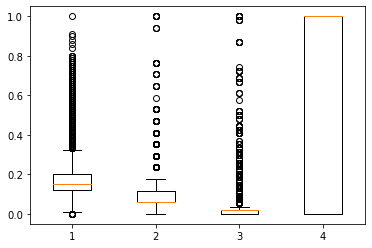

In [44]:
# pd.DataFrame(X_tr)
plt.boxplot([X_tr['age'], X_tr['profiles'],X_tr['cases'],X_tr['gender']])
plt.show()

In [142]:
iqr_age = 1.5*(np.percentile(X_tr['age'], 75) - np.percentile(X_tr['age'], 25))
q1_age = np.percentile(X_tr['age'], 25)
q3_age = np.percentile(X_tr['age'], 75)

In [145]:
iqr_profiles = 1.5*(np.percentile(X_tr['profiles'], 75) - np.percentile(X_tr['profiles'], 25))
q1_profiles = np.percentile(X_tr['profiles'], 25)
q3_profiles = np.percentile(X_tr['profiles'], 75)

In [139]:
iqr_cases = 1.5*(np.percentile(X_tr['cases'], 75) - np.percentile(X_tr['cases'], 25))

In [140]:
iqr_gender = 1.5*(np.percentile(X_tr['gender'], 75) - np.percentile(X_tr['gender'], 25))

In [143]:
X_tr[(X_tr['age']>(q3_age+iqr_age)) | (X_tr['age']<(q1_age-iqr_age)) | 
     (X_tr['cases']>(q3_cases+iqr_cases)) | (X_tr['cases']<(q1_cases-iqr_cases))]

,profiles,cases,gender,age
7,0.3750,0.203704,0.0,0.559633
15,0.1250,0.000000,1.0,0.422018
17,0.1250,0.092593,0.0,0.385321
33,0.0625,0.000000,0.0,0.724771
36,0.1250,0.074074,0.0,0.440367
...,...,...,...,...
9008,0.0000,0.018519,0.0,0.495413
9019,0.0000,0.000000,1.0,0.422018
9046,0.0625,0.000000,0.0,0.422018
9059,0.0000,0.037037,0.0,0.403670


## Pickle file

In [56]:
# open a file, where you ant to store the data
file = open('Subs_model.pkl', 'wb')

# dump information to that file
pickle.dump(gbc, file)

In [25]:
# open a file, where you ant to store the data
file = open('scaler.pkl', 'wb')

# dump information to that file
pickle.dump(scale, file)

In [57]:
input

,age,profiles,cases,Output,gender
3588,57.0,1.0,1,1,0
1072,35.0,3.0,1,1,1
21884,18.0,2.0,1,0,1
19364,23.0,1.0,1,0,1
17317,22.0,1.0,1,0,1
...,...,...,...,...,...
65042,26.0,2.0,1,0,1
4199,61.0,1.0,2,1,0
2306,30.0,8.0,2,1,0
39670,38.0,1.0,0,0,0


In [62]:
gbc.predict([[1,1,1,23]])[0]

0